In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [3]:
%ls
%cd drive/MyDrive/Bioinformatics/
%ls

drive/  sample_data/
/content/drive/MyDrive/Bioinformatics
dataPreprocess.py  __pycache__/  README.md  Trial2.ipynb  Trial.ipynb


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Bioinformatics')

In [5]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python

Building dependency tree       
Reading state information... Done
53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.


In [6]:
import dataPreprocess
from openslide import OpenSlide

In [8]:
!ls

dataPreprocess.py  __pycache__	README.md  Trial2.ipynb  Trial.ipynb


In [9]:
filenameIm = "/content/drive/MyDrive/BioinfoImages/rawImages/M-3.tiff"
filenameXML = "/content/drive/MyDrive/BioinfoImages/sqLabels/M-3.xml"
imageTiles= dataPreprocess.getImageTiles(filenameIm,filenameXML)

Test
22679
20219
18049
20309
9684
12309
13947
16810
13893
8430
15262
16733
10978


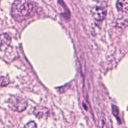

In [12]:
imageTiles[2]

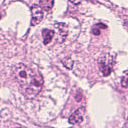

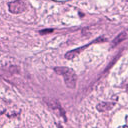

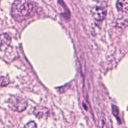

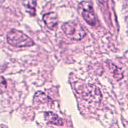

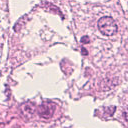

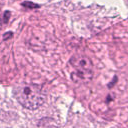

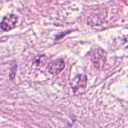

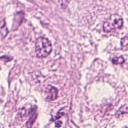

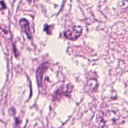

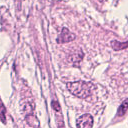

In [13]:
from IPython.display import Image 

for i in range(10):
  display(imageTiles[i])

In [22]:
!git add Trial2.ipynb
!git add dataPreprocess.py